In [1]:
import pandas as pd
import numpy as np
import re
import math
import pickle
import scipy
import matplotlib.pyplot as plt

from sklearn import metrics
from preprocessing import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
from scipy.cluster import hierarchy as hc

In [2]:
X_train, y_train = pickle.load(open('train_final.p','rb'))
X_valid, y_valid = pickle.load(open('valid_final.p','rb'))
X_test, y_test = pickle.load(open('test_final.p','rb'))

In [3]:
train_drop = pd.Series(y_train)[pd.Series(np.exp(y_train)) > 1e6].index
valid_drop = pd.Series(y_valid)[pd.Series(np.exp(y_valid)) > 1e6].index

In [4]:
valid_drop = valid_drop + len(X_train)

In [5]:
X_train = X_train.drop(train_drop)
X_valid = X_valid.drop(valid_drop)

ValueError: labels [  357   500   939  1663  1849  1944  1996  2289  2469  2776  2881  3727
  3877  3942  4132  4136  4538  4827  4996  5060  5219  5458  5862  6471
  6918  7441  7479  8050  8356  8559  9611 11080 11899 12570 13201 13422
 13586 13753 14979 15167 15780 16467 16654 16711 17076 18091 18360 18841
 18924 18925 19651 20342 20667 20973 21789 22117 22603 22635 23370 23686
 23788 23800 23844 24881 24897 24919 24988 25053 25763 25898 27454 27497
 27605 27618 27712 28028 28067 28962 29431 30628 30788 30937 31441 32071
 32122 32631 33037 33973 34137 34465 35434 35551 35566 35966 36406 36512
 36730 37228 37709 37864 38997 39082] not contained in axis

In [6]:
y_train = np.exp(y_train)[np.exp(y_train) < 1e6]
y_valid = np.exp(y_valid)[np.exp(y_valid) < 1e6]

**Baseline Model**

In [3]:
m = RFR(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

C:\Users\ZBook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 1.34 s
[0.07957391797671443, 0.19483674130044862, 0.9722017654763445, 0.8358920028497475, -5.819524027257855]


**Nr Estimators**

In [6]:
# n_estimators

m1 = RFR(n_estimators=10, n_jobs=-1, oob_score=True)
m2 = RFR(n_estimators=20, n_jobs=-1, oob_score=True)
m3 = RFR(n_estimators=40, n_jobs=-1, oob_score=True)
m4 = RFR(n_estimators=80, n_jobs=-1, oob_score=True)
m5 = RFR(n_estimators=160, n_jobs=-1, oob_score=True)
%time m1.fit(X_train, y_train)
%time m2.fit(X_train, y_train)
%time m3.fit(X_train, y_train)
%time m4.fit(X_train, y_train)
%time m5.fit(X_train, y_train)
print_score(m1, X_train, y_train, X_valid, y_valid)
print_score(m2, X_train, y_train, X_valid, y_valid)
print_score(m3, X_train, y_train, X_valid, y_valid)
print_score(m4, X_train, y_train, X_valid, y_valid)
print_score(m5, X_train, y_train, X_valid, y_valid)

C:\Users\ZBook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 1.41 s


C:\Users\ZBook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 2.47 s
Wall time: 4.49 s
Wall time: 8.58 s
Wall time: 16.1 s
[0.07901908718915401, 0.19343940014584804, 0.9725880615655239, 0.8382374798892507, -6.4177130408979535]
[0.07170318879152918, 0.1880198889632722, 0.977428902804899, 0.8471745742316062, 0.7162053344330437]
[0.06716158870175294, 0.18536571107358443, 0.9801976080481758, 0.8514588322935012, 0.8576271997334592]
[0.06572708222926499, 0.18366312881183702, 0.9810344938516704, 0.8541749991342362, 0.8633295167687445]
[0.06444655000694528, 0.183396794484964, 0.9817662885605667, 0.854597621177003, 0.8660650102367928]


In [7]:
m6 = RFR(n_estimators=320, n_jobs=-1, oob_score=True)
%time m6.fit(X_train, y_train)
print_score(m6, X_train, y_train, X_valid, y_valid)

Wall time: 32 s
[0.0639608188664054, 0.1826052404607553, 0.9820401063280342, 0.8558500472260352, 0.8684801654338223]


In [8]:
m6 = RFR(n_estimators=640, n_jobs=-1, oob_score=True)
%time m6.fit(X_train, y_train)
print_score(m6, X_train, y_train, X_valid, y_valid)

Wall time: 1min 5s
[0.06364861734227353, 0.18243977514835344, 0.9822150078302306, 0.8561111679956779, 0.8689737843877382]


**Analysis:** Accuracy is still improving, albeit at a very slow pace, and the models are taking much longer to train.

**Min Samples Leaf**

In [9]:
# min_samples_leaf

m1 = RFR(n_estimators=80, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m2 = RFR(n_estimators=80, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m3 = RFR(n_estimators=80, min_samples_leaf=10, n_jobs=-1, oob_score=True)
m4 = RFR(n_estimators=80, min_samples_leaf=25, n_jobs=-1, oob_score=True)
%time m1.fit(X_train, y_train)
%time m2.fit(X_train, y_train)
%time m3.fit(X_train, y_train)
%time m4.fit(X_train, y_train)
print_score(m1, X_train, y_train, X_valid, y_valid)
print_score(m2, X_train, y_train, X_valid, y_valid)
print_score(m3, X_train, y_train, X_valid, y_valid)
print_score(m4, X_train, y_train, X_valid, y_valid)

Wall time: 6.54 s
Wall time: 5.95 s
Wall time: 5.93 s
Wall time: 4.76 s
[0.09218711194527808, 0.1845609413422369, 0.9626907817018164, 0.8527458226318654, 0.8619469299775945]
[0.1138034674374827, 0.1863899265415573, 0.9431426361605815, 0.8498128054088684, 0.857501847853817]
[0.14307132616951754, 0.19112590508139957, 0.9101369951912988, 0.8420836342346627, 0.8476678384346147]
[0.17602227076625027, 0.20089239801948203, 0.8639774321291971, 0.8255322997467264, 0.8267547804804712]


**Analysis:** min_leaf_samples=1 outperformed all of these models

**Max Features**

In [10]:
# max_feaures

m1 = RFR(n_estimators=80, min_samples_leaf=1, max_features=1, n_jobs=-1, oob_score=True)
m2 = RFR(n_estimators=80, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
m3 = RFR(n_estimators=80, min_samples_leaf=1, max_features='sqrt', n_jobs=-1, oob_score=True)
m4 = RFR(n_estimators=80, min_samples_leaf=1, max_features='log2', n_jobs=-1, oob_score=True)
%time m1.fit(X_train, y_train)
%time m2.fit(X_train, y_train)
%time m3.fit(X_train, y_train)
%time m4.fit(X_train, y_train)
print_score(m1, X_train, y_train, X_valid, y_valid)
print_score(m2, X_train, y_train, X_valid, y_valid)
print_score(m3, X_train, y_train, X_valid, y_valid)
print_score(m4, X_train, y_train, X_valid, y_valid)

Wall time: 2.15 s
Wall time: 4.46 s
Wall time: 2.66 s
Wall time: 2.9 s
[0.0695445133269155, 0.19529197183602365, 0.9787674832535055, 0.8351242395798574, 0.8456054059915503]
[0.06456078864983092, 0.180812366884292, 0.9817015887242374, 0.8586667671257495, 0.8666889146141559]
[0.06472258222281474, 0.18116768409468056, 0.9816097597646558, 0.8581107490488591, 0.8662478591553904]
[0.06459852633968699, 0.18098781363496733, 0.9816801905472795, 0.8583923557322382, 0.8670104779819017]


**Analysis:** max_features=0.5 once again outperformed the other settings.

**Final Tuning**

In [50]:
# untransformed

m1 = RFR(n_estimators=320, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m2 = RFR(n_estimators=640, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m3 = RFR(n_estimators=1280, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m4 = RFR(n_estimators=80, min_samples_leaf=1, max_features='log2', n_jobs=-1, oob_score=True)
%time m1.fit(X_train, y_train)
# %time m2.fit(X_train, y_train)
# %time m3.fit(X_train, y_train)
# %time m4.fit(X_train, y_train)
print_score(m1, X_train, y_train, X_valid, y_valid)
# print_score(m2, X_train, y_train, X_valid, y_valid)
# print_score(m3, X_train, y_train, X_valid, y_valid)
# print_score(m4, X_train, y_train, X_valid, y_valid)

Wall time: 18 s
[20451.816375202914, 57124.26029563867, 0.9787829392698628, 0.835759534410878, 0.8441206117078258]


In [56]:
# transformed

m1 = RFR(n_estimators=320, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m2 = RFR(n_estimators=640, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m3 = RFR(n_estimators=1280, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
# m4 = RFR(n_estimators=80, min_samples_leaf=1, max_features='log2', n_jobs=-1, oob_score=True)
%time m1.fit(X_train, y_train)
# %time m2.fit(X_train, y_train)
# %time m3.fit(X_train, y_train)
# %time m4.fit(X_train, y_train)
print_score(m1, X_train, y_train, X_valid, y_valid)
# print_score(m2, X_train, y_train, X_valid, y_valid)
# print_score(m3, X_train, y_train, X_valid, y_valid)
# print_score(m4, X_train, y_train, X_valid, y_valid)

Wall time: 18.3 s
[0.06192240737476096, 0.17616947320789794, 0.9819982288003669, 0.8563977826632683, 0.8674250745144898]


In [55]:
y_train = np.log(y_train)
y_valid = np.log(y_valid)

In [51]:
errors = abs(m1.predict(X_valid) - y_valid)

In [58]:
errors = abs(np.exp(m1.predict(X_valid)) - np.exp(y_valid))

In [52]:
errors.mean()

36579.53886091559

In [59]:
errors.mean()

36311.200973133506

In [66]:
np.exp(y_valid).mean()

269992.33119251917

In [64]:
36500 / 270000

0.13518518518518519

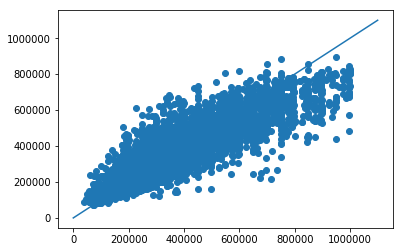

In [54]:
# untransformed
plt.scatter(y_valid, m1.predict(X_valid))
plt.plot(np.arange(1.1e6),np.arange(1.1e6))

In [78]:
errors[:len(errors)*100//95]

AttributeError: 'numpy.ndarray' object has no attribute 'median'

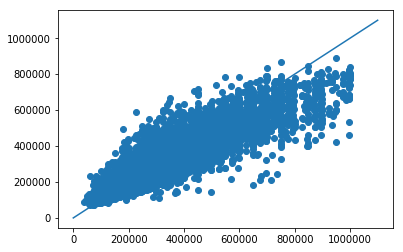

In [57]:
# transformed
plt.scatter(np.exp(y_valid), np.exp(m1.predict(X_valid)))
plt.plot(np.arange(1.1e6),np.arange(1.1e6))

In [61]:
np.exp(m1.predict(X_valid))

array([265606.35645537, 225850.39095486, 216035.70747456, ...,
       153587.58746606, 181842.10789085, 261849.71917319])

In [29]:
(np.exp(y_train) > 1e6).sum()

211

In [30]:
(np.exp(y_valid) > 1e6).sum()

110

In [31]:
(np.exp(y_test) > 1e6).sum()

173

In [26]:
len(y_valid)

19573

In [27]:
110/19573 * 100

0.5619986716395033